/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2832: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


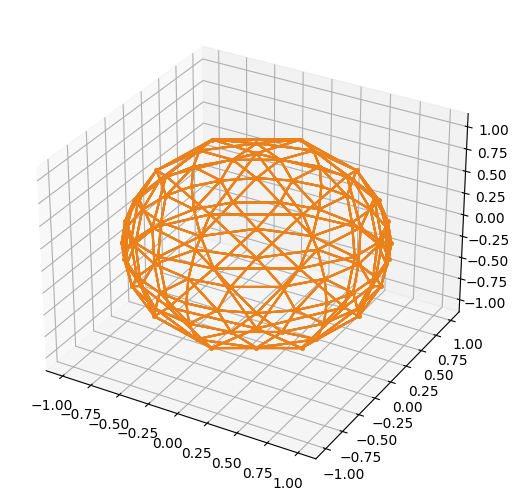

In [54]:
# Imports and physical parameters
import numpy as np
import scipy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import *
from matplotlib.widgets import Slider
from lsm import HNdC_ijk

# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ddgclib._complex import Complex
from ddgclib import *
from ddgclib._complex import *
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._capillary_rise_flow import * #plot_surface#, curvature
from ddgclib._hyperboloid import *
from ddgclib._catenoid import *
from ddgclib._ellipsoid import *
from ddgclib._eos import *
from ddgclib._misc import *
from ddgclib._plotting import *
from ddgclib._sphere import *
#from ddgclib._case2 import *

# Numerical parameters #Stated this is what to pla
N = 7  # Determines mesh incidence
refinement = 2

r = 1  # analytical area = 2 pi r**2, so take 2 pi
HC = sphere_from_cap(r, N=N, refinement=refinement)


if 1:
    HC.plot_complex()
    plt.show()

# Plot conforimation
if 0:
    ps = plot_polyscope(HC, vector_field=None, scalar_field=None, fn='', up="x_up"
                        , stl=False)
    ps.show()

In [55]:
HC.V.print_out()

Vertex cache of size: 98:
Vertex: (0.0, 0.0, -1.0)
Connections: (0.5728219618694800744, -0.3307189138830736962, -0.75) (-0.5728219618694802567, 0.33071891388307338052, -0.75) (0.5728219618694799607, 0.33071891388307389324, -0.75) (-0.57282196186947982857, -0.33071891388307412206, -0.75) (0.0, 0.66143782776614764755, -0.75) (0.0, -0.66143782776614764755, -0.75) 
Vertex: (0.0, 1.0, 0.0)
Connections: (-0.24019223070763084626, 0.9707253433941509274, 0.0) (0.0, 0.9682458365518542213, 0.25) (0.24019223070763067993, 0.9707253433941509685, 0.0) (0.0, 0.9682458365518542213, -0.25) 
Vertex: (0.866025403784438607, 0.50000000000000011704, 0.0)
Connections: (0.7205766921228920344, 0.69337524528153647135, 0.0) (0.8385254915624210775, 0.4841229182759272123, -0.25) (0.9607689228305227579, 0.27735009811261470975, 0.0) (0.8385254915624210775, 0.4841229182759272123, 0.25) 
Vertex: (0.86602540378443875813, -0.49999999999999980712, 0.0)
Connections: (0.838525491562421244, -0.4841229182759269239, -0.25) (0.

In [59]:
# Compute the curvature
HNdA_i = []  # total HNdA_i at vertex i
A_ijk = []  # total HNdA_i for edge ij
C_ij = []
alpha_ij = []

for v in HC.V:
    #print(f'v.index = {v.index}')
    N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
    N_f0 = normalized(N_f0)[0]
    F, nn = vectorise_vnn(v)
    # Compute discrete curvatures
    c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
    # Append lists
    c_outd['HNdA_ij']
    HNdA_i.append(c_outd['HNdA_i'])
    C_ij.append(c_outd['C_ij'])
    alpha_ij.append(c_outd['alpha_ij'])
    A_ijk.append(c_outd['A_ijk'])
    #print(f'N_f0 dot = {N_f0}')
    np.dot(N_f0, c_outd['HNdA_i'])
    print(f"np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = {np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij'])}")

# [0]
# HNdA_i = 0.5 * np.sum(HNdA_ij, axis=0)
# HN_i = np.sum(HNdA_i) / np.sum(C_ij)
#HNdA_ij, HN_i, HNdA_i, C_ij, alpha_ij
print(f'np.sum(HNdA_i, axis=0) = {np.sum(HNdA_i, axis=0)}')
print(f'HNdA_i[0] = {HNdA_i[0]}')
print(f'nn = {nn}')
print(f'F= {F}')

# Now we compute the surface areas
for v in HC.V:
    pass# HNdC_ijk(e_ij, l_ij, l_jk, l_ik)


np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -2.0
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -2.0
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -2.0000000000000018
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -2.0
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -2.0
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -2.0
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -2.000000000000001
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -1.9999999999999996
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -2.0000000000000004
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -1.9999999999999993
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -2.0
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -2.0000000000000004
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -1.9999999999999987
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = -2.0
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_ou

In [58]:
np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']), N_f0, c_outd['HNdA_i']

(-1.9999999999999997273,
 array([0.95079854, 0.18298126, 0.25      ], dtype=float128),
 array([-0.17424667, -0.03336562, -0.0521759 ], dtype=float128))

In [43]:
#v1 = HC.V[0]

In [44]:
v1.HNdA_i = 1

In [152]:
def HNdC_ijk(e_ij, l_ij, l_jk, l_ik):
    """
    Computes the dual edge and dual area using Heron's formula.

    :param e_ij: vector, edge e_ij
    :param l_ij: float, length of edge ij
    :param l_jk: float, length of edge jk
    :param l_ik: float, length of edge ik
    :return: hnda_ijk: vector, curvature vector
             c_ijk: float, dual areas
    """
    lengths = [l_ij, l_jk, l_ik]
    # Sort the list, python sorts from the smallest to largest element:
    lengths.sort()
    # We must have use a ≥ b ≥ c in floating-point stable Heron's formula:
    a = lengths[2]
    b = lengths[1]
    c = lengths[0]
    A = (1 / 4.0) * np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)))
    # Dual weights (scalar):
    w_ij = (1 / 8.0) * (l_jk ** 2 + l_ik ** 2 - l_ij ** 2) / A   # w_ij = abs(w_ij)

    # Mean normal curvature (1x3 vector):
    hnda_ijk = w_ij * e_ij  # curvature from this edge jk in triangle ijk with w_jk = 1/2 cot(theta_i^jk)

    # Dual areas
    h_ij = 0.5 * l_ij
    b_ij = abs(w_ij) * l_ij  # = ||0.5 cot(theta_i^jk)|| * 0.5*l_ij
    c_ijk = 0.5 * b_ij * h_ij
    return hnda_ijk, c_ijk

def A_ijk():
    pass


#TODO: Since sparse arrays are too expensive to recreate and add to,
#      we might want cache edge lengths instead. higher dimensional
#      simplices could be done with a lexigraphic cache.
#      This is simple to parallelise on CPUs, but might be much harder
#      to do on GPUs.

def hndA_i(v, n_i=None):
    """
    Compute the mean normal curvature of vertex
    
    :param v: vertex object
    :return: HNdA_i: the curvature tensor at input vertex v 
             c_i:  the dual area of the vertex
    """
    # NOTE: THIS MUST BE REPLACED WITH THE LEVEL SET PLANE VECTOR:
    if n_i is not None:
        n_i = v.x

    # Initiate
    HNdA_i = np.zeros(3)  # np.zeros([len(v.nn), 3])  # Mean normal curvature 
    C_i = 0.0  # np.zeros([len(v.nn), 3])  # Dual area around edge in a surface
    vi = v
    for vj in v.nn:
        # Compute the intersection set of vertices i and j:
        e_i_int_e_j = vi.nn.intersection(vj.nn)  # Set of size 1 or 2
        e_ij = vj.x_a - vi.x_a  # Compute edge ij (1x3 vector)
        e_ij = - e_ij  # WHY???
        vk = list(e_i_int_e_j)[0]  # index in triangle ijk  # NOTE: k = vk.index
        e_ik = vk.x_a - vi.x_a  # Compute edge ik (1x3 vector)
        
        #NOTE: The code below results in the INCORRECT values unless we set
        #      e_ij = - e_ij  # WHY???
        if 1:
            # Discrete vector area:
            # Simplex areas of ijk and normals
            wedge_ij_ik = np.cross(e_ij, e_ik)
            # If the wrong direction was chosen, choose the other:
            print(f'np.dot(normalized(wedge_ij_ik)[0], n_i) = {np.dot(normalized(wedge_ij_ik)[0], n_i)}')
            if np.dot(normalized(wedge_ij_ik)[0], n_i) < 0:
                #print(f'e_ij_prev = {e_ij}')
                e_ij_prev = copy.copy(e_ij)
                e_ij = vi.x_a - vj.x_a
                print(f'e_ij_new  - e_ij_prev = {e_ij -  e_ij_prev}')
                #e_ij = vi.x_a - vj.x_a
              #  e_ij = vj.x_a - vi.x_a  # Does not appear to be needed, 
              #                          # but more tests need to be done

        if len(e_i_int_e_j) == 1:  # boundary edge
            vk = list(e_i_int_e_j)[0]  # Boundary edge index
            # Compute edges in triangle ijk
            e_ik = vk.x_a - vi.x_a
            e_jk = vk.x_a - vj.x_a
            # Find lengths (norm of the edge vectors):
            l_ij = np.linalg.norm(e_ij)
            l_ik = np.linalg.norm(e_ik)  # NOTE: l_ki = l_ik
            l_jk = np.linalg.norm(e_jk)
            hnda_ijk, c_ijk = HNdC_ijk(e_ij, l_ij, l_jk, l_ik)
            
            # Save results
            HNdA_i += hnda_ijk
            C_i += c_ijk

        else:  # len(e_i_int_e_j) == 2 mathematically guaranteed:
            vl = list(e_i_int_e_j)[1]  # index in triangle ijl
            # Compute dual for contact angle alpha
            e_jk = vk.x_a - vj.x_a
            # wedge_ij_ik = np.cross(e_ij, e_ik)
            # Find lengths (norm of the edge vectors):
            l_ij = np.linalg.norm(e_ij)
            l_ik = np.linalg.norm(e_ik)  # NOTE: l_ki = l_ik
            l_jk = np.linalg.norm(e_jk)
            hnda_ijk, c_ijk = HNdC_ijk(e_ij, l_ij, l_jk, l_ik)

            # Contact angle beta
            e_il = vl.x_a - vi.x_a
            e_jl = vl.x_a - vj.x_a
            l_il = np.linalg.norm(e_il)  # NOTE: l_ki = l_ik
            l_jl = np.linalg.norm(e_jl)
            hnda_ijl, c_ijl = HNdC_ijk(e_ij, l_ij, l_jl, l_il)

            # Save results
            HNdA_i += hnda_ijk
            HNdA_i += hnda_ijl
            C_i += c_ijl
            C_i += c_ijk

    return HNdA_i, C_i

# Start main loop
HNdA_ijk_l, C_ijk_l = [], []
for v in HC.V:
    n_i = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
    n_i = normalized(n_i)[0]  
    n_test = n_i + (np.random.rand(3) - 0.5)
    HNdA_i, C_i = hndA_i(v, n_i=n_test)
    print(f"np.dot(n_i, HNdA_i)/C_i, n_i, HNdA_i = {np.dot(n_i, HNdA_i)/C_i}")
    #break

np.dot(normalized(wedge_ij_ik)[0], n_i) = -0.916515138991168
e_ij_new  - e_ij_prev = [0. 0. 0.]
np.dot(normalized(wedge_ij_ik)[0], n_i) = -0.916515138991168
e_ij_new  - e_ij_prev = [0. 0. 0.]
np.dot(normalized(wedge_ij_ik)[0], n_i) = 0.916515138991168
np.dot(normalized(wedge_ij_ik)[0], n_i) = 0.916515138991168
np.dot(normalized(wedge_ij_ik)[0], n_i) = 0.916515138991168
np.dot(normalized(wedge_ij_ik)[0], n_i) = 0.916515138991168
np.dot(n_i, HNdA_i)/C_i, n_i, HNdA_i = 1.9999999999999998
np.dot(normalized(wedge_ij_ik)[0], n_i) = 0.9848570459681689
np.dot(normalized(wedge_ij_ik)[0], n_i) = 0.9848570459681689
np.dot(normalized(wedge_ij_ik)[0], n_i) = -0.9848570459681689
e_ij_new  - e_ij_prev = [0. 0. 0.]
np.dot(normalized(wedge_ij_ik)[0], n_i) = -0.9848570459681689
e_ij_new  - e_ij_prev = [0. 0. 0.]
np.dot(n_i, HNdA_i)/C_i, n_i, HNdA_i = 2.0
np.dot(normalized(wedge_ij_ik)[0], n_i) = 0.9848570459681689
np.dot(normalized(wedge_ij_ik)[0], n_i) = -0.9848570459681689
e_ij_new  - e_ij_prev = [0. 

In [141]:
n_i, HNdA_i, C_i

(array([ 0.,  0., -1.], dtype=float128),
 array([-1.26716129e-17,  2.11012848e-17, -7.93725393e-01]),
 0.39686269665968858852)

In [127]:
np.dot(n_i, HNdA_i)/C_i, n_i, HNdA_i

(0.13549857801723940743,
 array([0.95079854, 0.18298126, 0.25      ], dtype=float128),
 array([-0.04384896,  0.38612723, -0.06576363]))

In [102]:
HNdA_i, C_i

(array([ 1.26716129e-17, -2.11012848e-17,  7.93725393e-01]),
 0.19843134832984424472)

In [97]:
hnda_ijk, c_ijk, hnda_ijl, c_ijl

(array([ 0.        , -0.175     ,  0.06614378], dtype=float128),
 0.033071891388307390537,
 array([ 0.        , -0.175     ,  0.06614378], dtype=float128),
 0.033071891388307363287)

In [77]:
vi, vj

(<ddgclib._vertex.VertexCube at 0x7f181dd4f3d0>,
 <ddgclib._vertex.VertexCube at 0x7f181daf3670>)

In [89]:
k, k.index, list(HC.V.cache.items())[k.index][1]

(<ddgclib._vertex.VertexCube at 0x7f181daf22f0>,
 22,
 <ddgclib._vertex.VertexCube at 0x7f181daf22f0>)